In [1]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import GradientBoostingClassifier
from libs.simple_hyper_tuner import predict_print_valid_scores
from constants import source_path, target_name, x_path, y_path, test_x_path, predictions_path, model_path
import joblib
from sklearn.model_selection import GridSearchCV
from libs.simple_processing import categorize_train_valid_test, train_test_split
import numpy

X = pd.read_csv(x_path)
y = pd.read_csv(y_path)[target_name]
test_X = pd.read_csv(test_x_path)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [2]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   418 non-null    int64  
 1   PassengerId  418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


- F1 score:  0.802101506489654


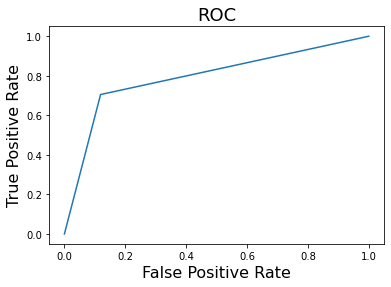

In [3]:
cv = 2
random_state = 50
train_size = 0.8

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=train_size, random_state=random_state)
X_train, X_valid, X_test = categorize_train_valid_test(X_train, X_valid, test_X)

params = {
    'model': GradientBoostingClassifier(
        n_estimators=400, random_state=0, learning_rate=0.025, max_depth=5, max_features="auto"
    )
}

grid_model = GridSearchCV(params['model'], {}, cv=cv, n_jobs=3, verbose=0)
grid_model.fit(X_train, y_train)
f1 = predict_print_valid_scores(grid_model, X_valid, y_valid, 0)

In [4]:
# Saving the model
joblib.dump(grid_model, model_path, compress=3)
grid_model = joblib.load(model_path)
print("Model saved.")

Model saved.


In [5]:
# Saving predictions
predictions = grid_model.predict(X_test)
results = pd.DataFrame({"PassengerId": X_test["PassengerId"],"Survived": predictions})
results.to_csv(predictions_path, index=False)
# numpy.savetxt(predictions_path, predictions, delimiter=",")

print("Results saved.")


Results saved.
